# Brain Tumors

### Instalacion de Librerias

In [2]:
%pip install kaggle
%pip install opencv-python
%pip install numpy matplotlib opencv-python tensorflow scikit-learn



[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 23.3 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 3.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.7/151.7 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.8/208.8 MB 12.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/130.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.5/9.5 MB 17.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 6.7 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.6/20.6 MB 17.5 

### 1. Introducción

La presencia de tumores malignos en el cerebro, especialmente el glioblastoma, representa una amenaza para la vida del paciente. Esta forma de cáncer cerebral no solo es la más común en adultos, sino también la de peor pronóstico, con una supervivencia media inferior a un año. Un factor determinante en el pronóstico y la respuesta a la quimioterapia es la metilación del promotor MGMT, una secuencia genética específica presente en el tumor.

En la actualidad, el análisis genético del cáncer requiere una intervención quirúrgica para extraer una muestra de tejido, seguido de varias semanas para determinar la caracterización genética del tumor. Dependiendo de estos resultados y del tipo de terapia inicial elegida, puede ser necesario realizar cirugías adicionales. Desarrollar un método preciso para predecir la genética del cáncer a través de imágenes (es decir, radiogenómica) podría reducir el número de cirugías necesarias y perfeccionar el tipo de terapia requerida.

#### Problemática:

La principal problemática radica en la invasividad del procedimiento actual para obtener información genética sobre los tumores cerebrales. La necesidad de intervenciones quirúrgicas para obtener muestras de tejido no solo conlleva riesgos inherentes, sino que también prolonga el tiempo necesario para obtener resultados. Este retraso puede afectar la rapidez con la que se inicia el tratamiento, lo que es crítico en casos de tumores cerebrales agresivos como el glioblastoma.

#### La Tecnología como Solución:

La tecnología de visión artificial emerge como una herramienta revolucionaria en la detección de tumores cerebrales. La capacidad de analizar imágenes médicas de manera precisa y no invasiva ofrece una alternativa prometedora al método convencional. Mediante algoritmos avanzados, la radiogenómica permite identificar características genéticas específicas de los tumores a partir de imágenes médicas, eliminando la necesidad de procedimientos quirúrgicos invasivos.

Al integrar la tecnología de visión artificial en el diagnóstico de tumores cerebrales, no solo se agiliza el proceso, sino que también se potencia la capacidad de personalizar los tratamientos de manera más efectiva. Esta aproximación no solo representa un avance significativo en la eficacia clínica, sino que también abre la puerta a una gestión más precisa y menos invasiva de pacientes con cáncer cerebral. En este contexto, exploramos cómo la aplicación de la visión artificial puede transformar la atención médica, brindando esperanza a aquellos afectados por esta devastadora enfermedad.

### 2. Datos

In [10]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Función para cargar y preprocesar las imágenes
def load_images(folder, label):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, (128, 128))  # Ajusta el tamaño según sea necesario
        img = img / 255.0  # Normalización
        images.append(img)
        labels.append(label)
    return images, labels

# Cargar imágenes positivas y negativas
positive_images, positive_labels = load_images('/Users/sergiogonzalez/Documents/GitHub/IA-TEC/Julio/Iplementación de un modelo de deep learning/brain_mri_scan_images/positive', 1)
negative_images, negative_labels = load_images('/Users/sergiogonzalez/Documents/GitHub/IA-TEC/Julio/Iplementación de un modelo de deep learning/brain_mri_scan_images/negative', 0)

# Crear conjuntos de datos y etiquetas
X = np.array(positive_images + negative_images)
y = to_categorical(np.array(positive_labels + negative_labels))

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 3. Desarrollo del Modelo

In [12]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Crear un modelo más complejo
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

# Compilar el modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [13]:
# Entrenar el modelo con más épocas y un tamaño de lote mayor
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))


Epoch 1/20
3/3 [==============================] - 2s 554ms/step - loss: 1.4188 - accuracy: 0.5028 - val_loss: 0.7900 - val_accuracy: 0.3261
Epoch 2/20
3/3 [==============================] - 1s 496ms/step - loss: 0.6273 - accuracy: 0.6851 - val_loss: 0.5466 - val_accuracy: 0.7826
Epoch 3/20
3/3 [==============================] - 1s 495ms/step - loss: 0.5844 - accuracy: 0.7459 - val_loss: 0.5024 - val_accuracy: 0.7826
Epoch 4/20
3/3 [==============================] - 1s 499ms/step - loss: 0.5930 - accuracy: 0.7348 - val_loss: 0.5307 - val_accuracy: 0.8043
Epoch 5/20
3/3 [==============================] - 1s 495ms/step - loss: 0.5337 - accuracy: 0.7182 - val_loss: 0.4950 - val_accuracy: 0.7826
Epoch 6/20
3/3 [==============================] - 1s 503ms/step - loss: 0.5164 - accuracy: 0.7514 - val_loss: 0.4809 - val_accuracy: 0.7826
Epoch 7/20
3/3 [==============================] - 1s 496ms/step - loss: 0.4681 - accuracy: 0.7735 - val_loss: 0.4805 - val_accuracy: 0.8043
Epoch 8/20
3/3 [====

In [14]:
# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Accuracy: {accuracy}')


2/2 [==============================] - 0s 35ms/step - loss: 0.6380 - accuracy: 0.8913
Accuracy: 0.8913043737411499


2/2 [==============================] - 0s 35ms/step


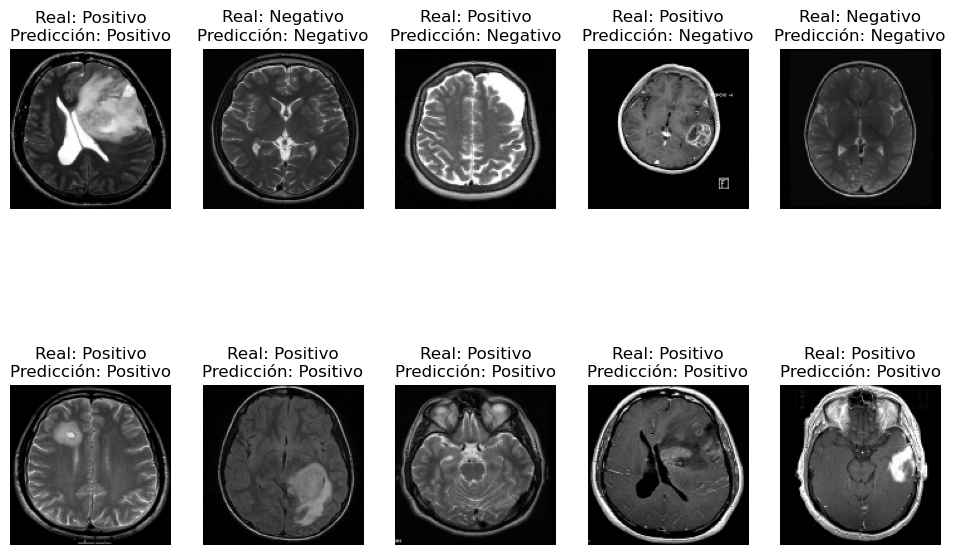

In [15]:
import matplotlib.pyplot as plt

# Obtén predicciones del modelo en el conjunto de prueba
predictions = model.predict(X_test)

# Mapea las clases a etiquetas legibles
class_labels = {0: 'Negativo', 1: 'Positivo'}

# Muestra algunas imágenes con sus predicciones
plt.figure(figsize=(12, 8))
for i in range(10):  # Mostrar las primeras 10 imágenes
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i])
    true_label = class_labels[np.argmax(y_test[i])]
    pred_label = class_labels[np.argmax(predictions[i])]
    plt.title(f'Real: {true_label}\nPredicción: {pred_label}')
    plt.axis('off')

plt.show()


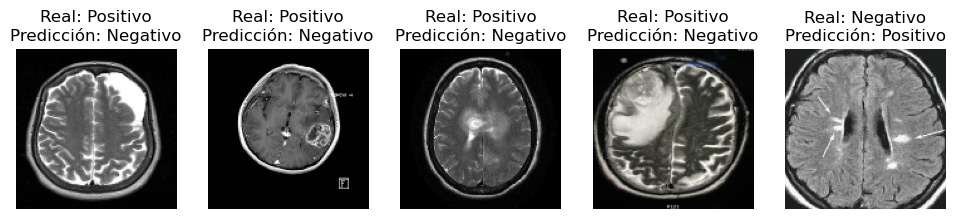

In [16]:
# Obtén índices de las imágenes que fueron clasificadas incorrectamente
incorrect_indices = np.where(np.argmax(predictions, axis=1) != np.argmax(y_test, axis=1))[0]

# Muestra algunas imágenes incorrectas con sus predicciones
plt.figure(figsize=(12, 8))
for i, idx in enumerate(incorrect_indices[:10]):  # Mostrar las primeras 10 imágenes incorrectas
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[idx])
    true_label = class_labels[np.argmax(y_test[idx])]
    pred_label = class_labels[np.argmax(predictions[idx])]
    plt.title(f'Real: {true_label}\nPredicción: {pred_label}')
    plt.axis('off')

plt.show()


### 4. Ajuste de Modelo

bla bla

### 5. Resultados

bla bla

### 6. Conclusiones

bla bla